# Classifier evaluation using the OOP interface (report generation)

We can also use the [sklearn_evaluation.ClassifierEvaluator](../api/evaluator.rst) class to pack the results from our estimator. This way we can generate plots and tables without having to pass the parameters over and over again. If we are evaluating more than one model at a time this also gives us a way to keep it organized. Furthermore, the ClassifierEvaluator class offers a way to create HTML reports from our model results.

In [2]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn_evaluation import ClassifierEvaluator

First, let’s load some data and split for training and testing.

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Let’s now train a classifier and predict on the test set.

In [4]:
est = RandomForestClassifier(n_estimators=5)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)
y_score = est.predict_proba(X_test)
feature_list = range(4)
target_names = ['setosa', 'versicolor', 'virginica']

Now that we have everything we need, let’s pack our results using ClassifierEvaluator, every parameter is optional.

In [5]:
ce = ClassifierEvaluator(est, y_test, y_pred, y_score,
                 feature_list, target_names,
                 estimator_name='RF')

We can use most of the functions in plot and table directly from the ClassifierEvaluator object, let’s see how to plot a confusion matrix.

<AxesSubplot: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

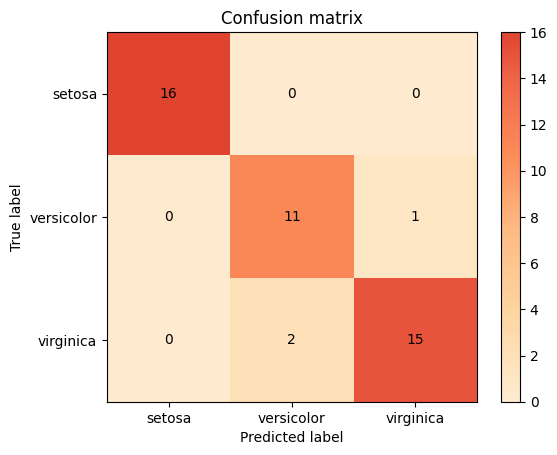

In [6]:
ce.confusion_matrix()

We can also generate HTML reports from our models by using the make_report function. The first parameter is a HTML or Markdown template with jinja2 format. If a pathlib.Path object is passed, the content of the file is read. Within the template, the evaluator is passed as “e”, so you can use things like {{e.confusion_matrix()}} or any other attribute/method. If None, a default template is used

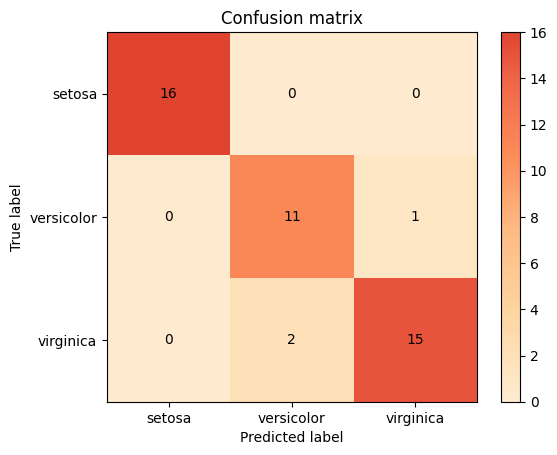

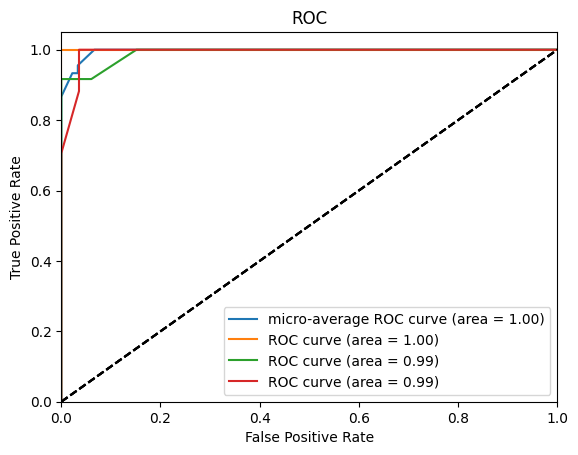

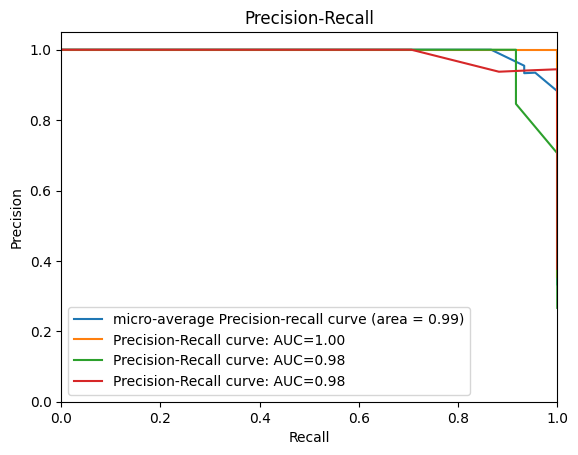

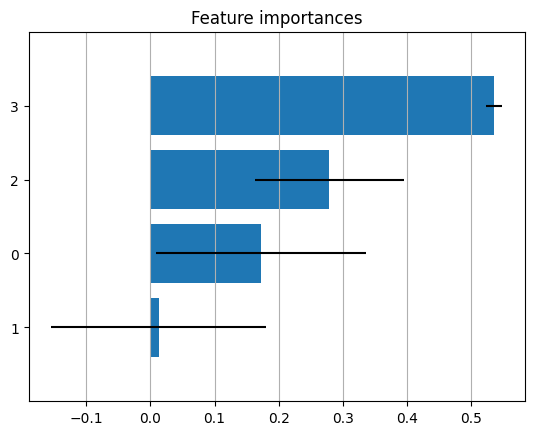

In [9]:
report = ce.make_report()

The function returns a Report object, which will automatically render in a Jupyter notebook, report.save(‘/path/to/report.html’) will save the report and report.rendered will return a string with the HTML report.